In [1048]:
#Neurone artificiel
#importation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.datasets import make_blobs

dimension de X: (100, 2)
dimension de y: (100, 1)


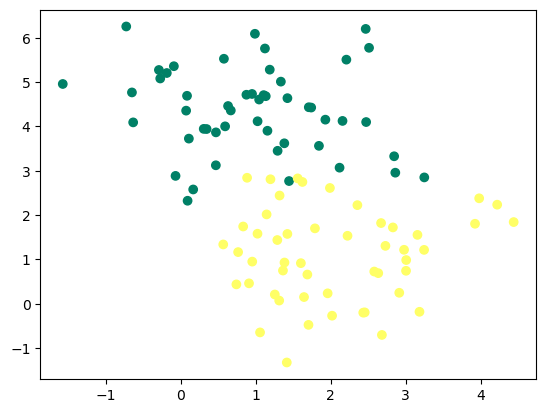

In [1049]:
#Génération du dataset
X, y=make_blobs(n_samples= 100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

#Affichage des dimension du dataset
print("dimension de X:", X.shape)
print("dimension de y:", y.shape)

#Mise en graphique du dataset
plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")
plt.show()

In [1050]:
#Création de la fonction d'initialisation de la matrice "W" et de l'entier "b"
def Initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [1051]:
#initialisation de la fonction de création du model linéaire
def Model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [1052]:
#initialisation de la fonction cout (logloss) afin de determiner la marge d'erreur de notre model linéaire
def Log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [1053]:
#initialisation des valeurs des gradient de W et b
def Gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 /len(y) * np.sum(A - y)
    return (dW, db)

In [1054]:
#initialisation de la fonction d'update servant a mettre a jour les valeur de W en fonction de dW et de b en fonction de db afin de miniùmiser la marge d'erreur
def Update(W, b, dW, db, LearningRate):
    W = W - LearningRate * dW
    b = b - LearningRate * db
    return (W, b)

In [1055]:
#initialisation de la fonction permettant de prédire à quelle classe appartiendrat un nouveaux cas selon "x" variable (2)
def Predict(X, W, b):
    A = Model(X, W, b)
    print(A)
    return A >= 0.5

In [1056]:
#initialisation de la fonction rassemblant toutes les autre pour former un neurone artificiel
def ArtificialNeuron(X, y, LearningRate = 0.1, NbIter = 100):
    #initialisation W, b
    W, b = Initialisation(X)

    #création d'une liste de suivit de la marge d'erreur du neurone en fonction du nombre d'itération
    Loss = []

    #Aprentissage: Répétition de la descente de grdient pour minimiser la marge d'erreure 
    for i in range(NbIter):
        A=Model(X, W, b)
        Loss.append(Log_loss(A, y))
        dW, db = Gradients(A, X, y)
        W, b = Update(W, b, dW, db, LearningRate)

    #prédiction du dataset selon notre neurone après aprentissage
    y_pred = Predict(X, W, b)

    #comparaison avec les vrai réponse
    print(accuracy_score(y, y_pred))
    
    
    
    #affichage de la liste de suivit de la marge d'erreur
    plt.plot(Loss)
    plt.show()

    #renvoi des paramètre finaux après aprentissage
    return (W, b)

[[9.79688138e-01]
 [6.22791607e-01]
 [5.18082049e-03]
 [8.88739676e-02]
 [9.64849669e-01]
 [3.30771238e-01]
 [7.61475671e-02]
 [9.67544074e-01]
 [4.57105461e-02]
 [7.73783334e-01]
 [3.30105495e-02]
 [8.15190806e-01]
 [3.68744341e-02]
 [1.60359382e-02]
 [6.75235745e-01]
 [9.89457701e-01]
 [9.88236894e-01]
 [3.19214556e-02]
 [5.67615062e-01]
 [5.53629690e-01]
 [5.60677414e-02]
 [3.78090404e-02]
 [3.52313676e-01]
 [5.30181359e-03]
 [9.39871220e-01]
 [3.78858770e-02]
 [8.07734208e-01]
 [1.39690586e-02]
 [8.65599153e-02]
 [7.53658384e-01]
 [9.65607891e-01]
 [5.26937372e-02]
 [5.35192277e-01]
 [9.66381696e-01]
 [3.95912523e-01]
 [3.05464666e-01]
 [6.89238507e-01]
 [5.59582898e-01]
 [5.08428441e-01]
 [3.16860896e-01]
 [4.51492407e-02]
 [1.51285886e-01]
 [9.61208671e-04]
 [1.77121842e-01]
 [1.68126301e-01]
 [8.20798139e-01]
 [9.41461262e-01]
 [9.23440007e-01]
 [3.89208057e-03]
 [1.23389526e-02]
 [9.04906833e-01]
 [4.19536712e-01]
 [1.03402487e-01]
 [5.68340945e-02]
 [8.69963723e-01]
 [5.286419

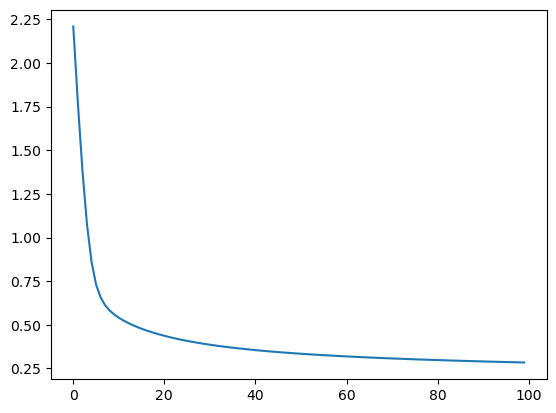

In [1057]:
#execution de la fonction d'entrainement du neurone artificiel
W, b = ArtificialNeuron(X, y)

/var/folders/q1/84vf8ynd79g502ds_gw52x580000gp/T/ipykernel_80509/3911570722.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_plant[0], new_plant[1], c='red', cmap="summer")


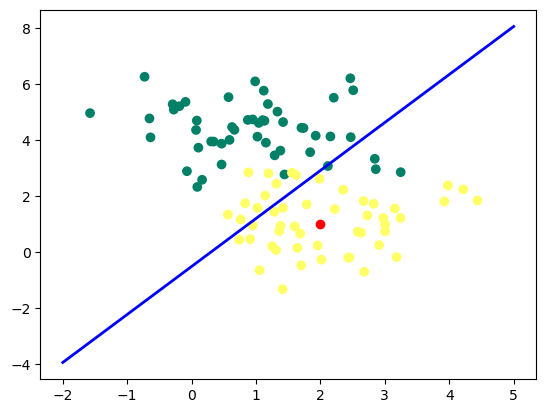

[0.83940979]


array([ True])

In [1058]:
#création d'une nouvelle plante
new_plant = np.array([2,1])

#calcul de la frontière de déscision
x0 = np.linspace(-2, 5, 100)
x1 = ( -W[0] * x0 -b) / W[1]

#affichage du dataset de base
plt.scatter(X[:,0], X[:,1], c=y, cmap="summer")

#ajout de la nouvelle plante en rouge dans le dataset
plt.scatter(new_plant[0], new_plant[1], c='red', cmap="summer")


#affichage de la frontière de déscision
plt.plot(x0, x1, 'b', lw=2)
plt.show()

#prédiction sur le type de la nouvelle plante
Predict(new_plant, W, b)

